<h1>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Beneish's M-Score and Altman's Z-Score for analyzing stock returns of the companies listed in the S&amp;P500 </h1>
<br>


<h2> Abstract </h2>

<h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This paper aims to study the stock returns of companies that are likely to have manipulated their earnings and that are in a difficult financial situation (higher probability of bankruptcy). To that aim, the Beneish m-score and the Altman Z-Score models are employed for the companies listed in the S&P500 using the data obtained from the Thomson Reuters Eikon API from 1995 to 2020.
</h3>
<h3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using the original cut-offs defined by the creators of the respective ratios, the results show that those companies that are mor likely to have manipulated their earning obtain an average of 205 basis points (BPS) less every year, while those that have a higher chance of bankruptcy obtain an average of 224 less BPS each year. However, when combining the two models the results obtained are an average of 31 BPS each.
</h3>
<h3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In addition, by using the quintiles across each sector every year, the results obtained show that those companies in the fifth quintile of their sector’s m-score and in the first quintile of their sector’s z-score produce an average of 102 BPS less each year. Thus the z-score and the m-score can be useful for selecting better performing stocks.
</h3>

<h2> 1. Introduction </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;During the last few years there has been an increase in the questioning of the usefulness of financial statements for investors. The publication of the book <em>The End of Accounting (2016) </em> supported the existence of a downtrend in the usefulness of financial statements. Although other authors have supported the need of improvement in terms of reporting standards (Papa, 2018), they still defend a less extreme position or even support the growing utility of reporting ESG factors as a possible solution (Dreyer CFA, 2020).The flexibility of accounting standards is a double edge sword that gives managers a better position for manipulating earnings through different accounting choices. 
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this paper, the usefullness of financial analysis is analyzed by screening the stocks using the z-score and the m-score and studying the stock prices. Those companies with low probability of having manipulated earnings and low probability of bankruptcy are considered for a long position whereas those with high probabilities are considered for a short position.


<h2> 2. Literature Review </h2>

<h3> Beneish M-Score </h3>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Beneish m-score model (Beneish et al., 1999) is a quantitative model of eight variables obtained from financial statements that estimates the probability of earnings management for a given financial statement. The eight variables and the m-score are defined as follows:

<br>
$ \large{\text{Days Sales in Receivables Index (DSRI) }} = \huge{\frac{\frac{Receivables_t}{Sales_t}}{\frac{Receivables_{t-1}}{Sales_{t-1}}}} $

<br>
<strong>To calculate the DSRI we define the following function</strong>

In [1]:
def DSRI(df):
    return (df["receivables"] / df["sales"]) / (df["receivables_t2"] / df["sales_t2"])

<br>
<br>
<br>
$ \large{\text{Gross Margin Index (GMI) }}= \LARGE{\frac{\text{Gross margin}_{t-1}}{\text{Gross margin}_t}} $


<br>
<strong>To calculate the GMI we define the following function</strong>

In [2]:
def GMI(df):
    return (df["sales_t2"] - df["cogs_t2"]) / (df["sales"] - df["cogs"])

<br>
<br>
<br>
$\large{\text{Asset Quality Index (AQI) }} = \huge{\frac{1 - \frac{\text{Property plant and equipment}_t + \text{ Current assets}_t}{\text{Total assets}_t}}{1-\frac{\text{Property plant and equipment}_{t-1} + \text{ Current assets}_{t-1}}{\text{Total assets}_{t-1}}}} $

<br>
<strong>To calculate the AQI we define the following function</strong>

In [3]:
def AQI(df):
    AQI_t1 = (1 - (df["ppe"] + df["current_assets"]) / df["total_assets"])
    AQI_t2 = (1 - (df["ppe_t2"] + df["current_assets_t2"]) / df["total_assets_t2"])
    return AQI_t1 / AQI_t2

<br>
<br>
<br>
$\large{\text{Sales Growth Index (SGI) }} = \LARGE{\frac{Sales_t}{Sales_{t-1}}} $

<br>
<strong>To calculate the SGI we define the following function</strong>

In [4]:
def SGI(df):
    return (df["sales"] / df["sales_t2"])

<br>
<br>
<br>
$\large{\text{Depreciation Index (DEPI) }} =  \huge{\frac{\frac{Depreciation_{t-1} + \text{ Property plant and equipment}_{t-1}}{Depreciation_{t-1}}}{\frac{Depreciation_t + \text{ Property plant and equipment}_t}{Depreciation_t}}} $

<br>
<strong>To calculate the DEPI we define the following function</strong>

In [5]:
def DEPI(df):
    DEPI_t1 = (df["depreciation"] / (df["depreciation"] + df["ppe"]))
    DEPI_t2 = (df["depreciation_t2"] / (df["depreciation_t2"] + df["ppe_t2"]))
    return DEPI_t1 / DEPI_t2

<br>
<br>
<br>
$\large{\text{Sales General and Administrative Expenses Index (SGAI) }}= \huge{\frac{\frac{\text{Sales, general, and administrative expenses}_t}{Sales_t}}{\frac{\text{Sales, general, and administrative expenses}_{t-1}}{Sales_{t-1}}}} $

<br>
<strong>To calculate the SGAI we define the following function</strong>

In [6]:
def SGAI(df):
    return (df["sga"] / df["sales"]) / (df["sga_t2"] / df["sales_t2"])

<br>
<br>
<br>
$\large{\text{Leverage Index (LVGI) }} = \LARGE{\frac{Leverage_t}{Leverage_{t-1}}} $

<br>
<strong>To calculate the LVGI we define the following function</strong>

In [7]:
def LVGI(df):
    return (df["debt"] / df["total_assets"]) / (df["debt_t2"] / df["total_assets_t2"])

<br>
<br>
<br>
$\large{\text{Total Accruals to Total Assets (TATA) }} = \LARGE{\frac{\text{Inc. before extr. items} - \text{ Cash from operations}}{\text{Total assets}}} $

<br>
<strong>To calculate the TATA we define the following function</strong>

In [8]:
def TATA(df):
    return (df["inc"] - df["ncf"]) / df["total_assets"]

<br>
<br>
<br>
$\large{\text{M-Score }}= \large{–4.84 + 0.920 (DSRI) + 0.528 (GMI) + 0.404 (AQI) + 0.892 (SGI) + 0.115 (DEPI) }$
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\large{-0.172 (SGAI) + 4.679 (TATA) – 0.327 (LVGI)}$
<br>
<br>
<br>
<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The companies whose m-score are higher than -1.78 are considered likely to have manipulated their earnings, while those under -2.22 are considered that have fairer reports.</strong>
<br>

<br>
<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To calculate the M-Score we define the following function</strong>

In [9]:
def get_m_score(df):
    df["m-score"] = -4.84 + 0.92 * DSRI(df) + \
                    0.528 * GMI(df) + \
                    0.404 * AQI(df) + \
                    0.892 * SGI(df) + \
                    0.115 * DEPI(df) + \
                   -0.172 * SGAI(df) + \
                    4.679 * TATA(df) + \
                   -0.327 * LVGI(df)

<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There is sounding literature studying the Beneish m-score model for analyzing manipulations of earnings of companies. This model proved effective for Polish listed companies, excluding the financial sector, since 2010 (Hołda, 2020), for companies in Turkey from 2005 to 2017 (Özcan, 2018), for companies sanctioned and fined by the Financial Services Authority between 2012 and 2016 (Alfian and Triani, n.d.) and for Malaysian companies from 1996 to 2014 (Kamal, Salleh and Ahmad, 2016). 
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Furthermore, years after its publication, the Beneish m-model still classifies multiple stocks listed on different markets as likely to have manipulated earnings. Manufacturing and trading companies listed on the Ghana Stock Exchange from 2008 to 2017 were very likely to engage in earnings management (Anning and Adusei, 2020). In addition, the z-score showed good results in predicting the manipulation of financial statements. Furthermore, for companies listed on the Ghana Stock Exchange from 2011 to 2016 it was found that big companies as well as small companies engaged in earnings management (Adu-Gyamfi, 2020). 55 % of the companies listed on the Bucharest Stock Exchange from 1998 to 2017 were likely to have managed their earnings based on the m-score, and reviewing the m-score for companies across other countries it is concluded that 67% of the companies reviewed have manipulated at least half of their financial statements (Mihalcea, 2020). In addition, that paper showed that on average those companies which are likely to have manipulated their earning exhibited better results for their reported ratios.
<br>
<br>

<h3> Altman Z-Score </h3>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Altman z-score model (Altman, 1968) is a quantitative model of five variables for predicting the probability of bankruptcy of a company. The z-score is defined as follows:

$\large{\text{Z-Score }} = \Large{1.2 (\frac{\text{Net working capital}}{\text{Total assets}}) + 1.4 (\frac{\text{Retained earnings}}{\text{Total assets}}) + 3.3 (\frac{\text{EBIT}}{\text{Total assets}})}$
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\Large{+ 0.6 (\frac{\text{Market value of equity}}{\text{Book value of liabilities}}) + 1.0 (\frac{\text{Sales}}{\text{Total assets}})} $
<br>
<br>
<br>
<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Companies with a Z-score over 3 are considered having a low risk of bankruptcy while those under 1.81 have a higher risk. </strong>

<br>
<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To calculate the M-Score we define the following function</strong>

In [10]:
def get_z_score(df):
    df["z-score"] = 1.2 * df['working_capital_to_assets'] + \
                    1.4 * df['retained_to_assets'] + \
                    3.3 * df['ebit_to_assets'] + \
                    0.6 * df['market_cap_to_liabilities'] + \
                    1.0 * df['asset_turnover']

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For companies listed in the Kuwaiti Stock Market, excluding banking and insurance companies, the combination of the m-score along with the z-score resulted in higher precision of classifying financial frauds (Akra and Chaya, 2020). For companies on selected sectors in Iran both models proved effective from 2009 to 2016 (Taherinia and Talebi, n.d.).
<br>
<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Although still supporting the effectiveness of the z-score and the m-score, for auditor’s fraud detection gap on the Gulf Cooperation Council companies from 2015 to 2017, the Dechow F-score was superior for detecting fraud (Hakami et al., 2020).

<h2> 3. Model definition, data and analysis </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The companies analyzed are the constituents of the S&P 500 at the start of each year since 1995 to the end of 2020. For each year, the m-score and the z-score are calculated using the latest financial statements.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The companies whose m-score is higher than -1.78 and a z-score lower than 1.81 are companies likely to have manipulated their earnings and which also have a higher probability of bankruptcy. On the opposite side, companies whose m-score is lower than -2.22 and z-score is higher than 3 are considered companies with fairer earnings reports and low probability of bankruptcy.

<h3> Assumptions</h3>

•	The companies with missing data for calculations are ignored. 
<br>
<br>
•	The returns of each company are those obtained during the following fiscal year, hence for some companies there is a lag depending on the date of publication of their latest financial statements and the stock price might have already reflected these financial statements. 
<br>
<br>
•	For certain companies, whose reporting dates are during the start of the year following their fiscal year end, the results include the period during which the financial statement was not available yet.


<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To start with we need to make some imports</h6>

In [11]:
import eikon as ek 
import pandas as pd 
import sys
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly as pyo

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The versions of the different libraries are showed to facilitate reproducibility</h6>

In [12]:
print(sys.version) # 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]

3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]


In [13]:
ek.__version__ # 1.1.18

'1.1.8'

In [14]:
pd.__version__ # 1.1.5

'1.1.5'

In [15]:
np.__version__ # 1.18.5

'1.18.5'

In [16]:
pyo.__version__ # 4.13.0

'4.13.0'

In [17]:
app_key = '...' # Replace app_key with your personal key

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We will set the key for the API, this key is obtained using the Eikon APP to generate keys</h6>

In [18]:
ek.set_app_key(app_key)

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We define the elements we want to analyze</h6>

In [19]:
chain = '0#.SPX' # Constituents of the SPX

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We define the dates for our study, as we need data from financial statements reported during the previous two years our first date is 1993, and our last date is 2021 because we need the returns up to the last date</h6>

In [31]:
dates = pd.date_range('1993', '2021', freq = 'YS')

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We define the fields needed for our study</h6>

In [21]:
fields = [
    'TR.TotalReturn52Wk',  # 52 Week Returns
    "TR.GICSSector"        # GICS Sector
]

beneish_fields = [
    "TR.F.LoansRcvblTot",            # Receivables
    "TR.F.TotRevBizActiv",           # Sales
    "TR.F.COGSTot",                  # Costs of goods sold
    "TR.F.PPEGrossTot",              # Property plant and equipment
    "TR.F.TotCurrAssets",            # Current assets
    "TR.F.TotAssets",                # Total assets
    "TR.F.DeprTot",                  # Depreciation
    "TR.F.SGATot",                   # Sales General and Administrative Expenses 
    "TR.F.IncBefDiscOpsExordItems",  # Income before discontinued operations and extraordinary items
    "TR.F.NetCashFlowOp",            # Net cash flow from operating activities
    "TR.F.DebtTot"                   # Total debt
]

altman_fields = [
    "TR.F.WkgCaptoTotAssets",        # Working capital to total assets
    "TR.F.RetainedEarntoTotAssets",  # Retained earnings to total assets
    "TR.F.EBITToTotAssets",          # EBIT to total assets
    "TR.F.MktCapToTotLiab",          # Market value of equity to liabilities
    "TR.F.AssetTurnover"             # Asset turnover
]

model_fields = beneish_fields + altman_fields

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We want to create two dictionaries to store the limit values of the first and the fifth quantile for the z-score and for the m-score</h6>

In [22]:
score_columns = ["z-score", "m-score"]

long_quantiles = {date:{column:{} for column in score_columns} for date in dates}
short_quantiles = {date:{column:{} for column in score_columns} for date in dates}

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We want to create two dictionaries to rename the columns of the dataframe that we will create, the second dictionary called columns_t2 appends "_t2" at the end of each column to distinguish them from the other columns</h6>

In [23]:
columns = {
    'Loans & Receivables - Total': "receivables",
    'Revenue from Business Activities - Total': "sales",
    'Cost of Revenues - Total': "cogs",
    'Property Plant & Equipment - Gross - Total': "ppe",
    'Total Current Assets': 'current_assets',
    'Total Assets': "total_assets",
    'Depreciation - Total': "depreciation",
    'Selling General & Administrative Expenses - Total': 'sga',
    'Income before Discontinued Operations & Extraordinary Items': 'inc',
    'Net Cash Flow from Operating Activities': 'ncf',
    'Debt - Total': 'debt',
    'Working Capital to Total Assets': 'working_capital_to_assets',
    'Retained Earnings - Total to Total Assets': 'retained_to_assets',
    'Earnings before Interest & Taxes (EBIT) to Total Assets': 'ebit_to_assets',
    'Market Capitalization to Total Liabilities': 'market_cap_to_liabilities',
    'Asset Turnover': 'asset_turnover'
}

columns_t2 = {x: f"{y}_t2" for x, y in columns.items()}

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We create an empty dataframe to store all the results in a single dataframe</h6>

In [24]:
full_df = pd.DataFrame()

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We are iterating over each year from 1995 to 2020, we create the parameters to get the financial statements two years ago, then one year ago and then to obtain the following year return for the companies constituents of the S&amp;P500 at the start of that year.
</h6>
<h6>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We create dataframes with data obtained from eikon and we store only the results and ignore the errors, after that, we drop the missing values, rename the columns and set the index to the instruments. We join the dataframes and we store only the instruments where all parameters are available. Then, we store that year as a column and compute the z-score and the m-score for the joined dataframe and drop the strange values.
</h6>
<h6>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finally, we store the values of the quintiles in our dictionaries for each sector and for each year. In addition, we store that year results in our previously created dataframe and we print the date to view the progress of our loop.
</h6>

In [30]:
# This step takes some minutes to complete, if the connection is lost in between it is possible to change the dates variable
# Setting the starting date in the dates variables to the year before the last year printed allows it to continue 
# However, the starting date in the dates variable should be changed again to 1993 for later use

for i, date in enumerate(dates[2:-1],2):
    
    # Dates conversion to obtain the data from eikon
    
    date_0 = date.to_period('D')
    date_1 = dates[i-1].to_period('D')
    date_2 = dates[i-2].to_period('D')
    date_end = dates[i+1].to_period('D')
    
    # Creation of parameters to get data for selected years from eikon
    
    parameters_first = {'SDate': f"{date_2}", 'EDate': f"{date_1}", 'FRQ': 'FY'}
    parameters_second = {'SDate': f"{date_1}", 'EDate': f"{date_0}", 'FRQ': 'FY'}
    parameters_last = {'SDate': f"{date_0}", 'EDate': f"{date_end}", 'FRQ': 'FY'}
    
    # Here we obtain the data and store it in dataframes, get_data returns a tuple containing (dataframe, errores)
    # we are only interested in the dataframe so we ignore the errors
    
    df_t1 = ek.get_data(f"{chain}({date_0})", model_fields, parameters_first)[0]
    df_t2 = ek.get_data(f"{chain}({date_0})", model_fields, parameters_second)[0]
    rets = ek.get_data(f"{chain}({date_0})", fields, parameters_last)[0]
    
    # We drop the instruments with missing rows, rename the columns and set the index to that instrument
    
    df_t1 = df_t1.dropna().rename(columns = columns).set_index('Instrument')
    df_t2 = df_t2.dropna().rename(columns = columns_t2).set_index('Instrument')
    rets = rets.dropna().rename(columns = {
        '52 Week Total Return': 'returns',
        'GICS Sector Name': 'sector'
    }).set_index('Instrument')
    
    # We join the dataframes and store the year as a column
    
    df = rets.join(df_t1, how = "inner").join(df_t2, how = "inner") 
    df["date"] = date.to_period('Y')
    
    # We compute the z-score, the m-score and drop the strange values
    
    get_z_score(df)
    get_m_score(df)
    df = df.replace([np.inf, -np.inf, ""], np.nan).dropna()

    # We fill our dictionaries with the data of the first and the fifth quintile
    
    for column in score_columns:
        for sector in df["sector"].unique(): 
            long_quantiles[date][column][sector] = df[df["sector"] == sector][column].quantile(0.8)
            short_quantiles[date][column][sector] = df[df["sector"] == sector][column].quantile(0.2)    
    
    # Finally we store the data in our previously created dataframe and print the date to view the progress
    
    full_df = full_df.append(df, ignore_index = True)
    print(date)

1998-01-01 00:00:00
1999-01-01 00:00:00
2000-01-01 00:00:00
2001-01-01 00:00:00
2002-01-01 00:00:00
2003-01-01 00:00:00
2004-01-01 00:00:00
2005-01-01 00:00:00
2006-01-01 00:00:00
2007-01-01 00:00:00
2008-01-01 00:00:00
2009-01-01 00:00:00
2010-01-01 00:00:00
2011-01-01 00:00:00
2012-01-01 00:00:00
2013-01-01 00:00:00
2014-01-01 00:00:00
2015-01-01 00:00:00
2016-01-01 00:00:00
2017-01-01 00:00:00
2018-01-01 00:00:00
2019-01-01 00:00:00
2020-01-01 00:00:00


<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We already have all the data required for our study so now we are going to plot it to observe the distribution for the m-score and the z-score across sectors or dates using plotly.express</h6>


<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; First, we create a function to plot the selected score across sectors, for visualization purposes we will limit the values of the m-score between -5 and 0 and the z-score between -10 and 15</h6>

In [32]:
# We define the auxiliary functions to limit the extreme values

def to_z_range(num):
    upper = 15
    lower = -10
    if num > upper: return upper
    elif num < lower: return lower
    else: return num

def to_m_range(num):
    upper = 0
    lower = -5
    if num > upper: return upper
    elif num < lower: return lower
    else: return num    

# We define a function with two parameters to plot the m-score or the z-score and across sectors or dates
    
def plot_score(m_score = True, sectors = True):

    # We create some variables to make the neccesary changes depending on the selected parameters
    
    col = "m-score" if m_score else "z-score"
    fun = to_m_range if m_score else to_z_range
    title = "M-Score" if m_score else "Z-Score"
    across = "sector" if sectors else "date"
    height = 1000 if sectors else 1500

    # We define a boxplot, set the colors to the sector and plot the m-score in the y-axis 

    fig = px.box(
        color = full_df[across] if sectors else None,
        y = None if sectors else full_df[across].astype(str),
        x = full_df[col].apply(fun), 
        template = "plotly_white",
        orientation = 'h',
        width = 1000, 
        height= height
    )

    # We style the titles and fonts for our plot

    fig.update_layout(
        title = "Z-Score across the years",
        xaxis_title = title,
        yaxis_title = across.capitalize(),
        legend_title = across.capitalize(),
        legend_traceorder = "reversed",
        font = dict(size = 18),
    )

    # We dont want to plot all the extreme values as only one point

    fig.update_traces(jitter = 1)

    # Finally we show the plot

    fig.show()

<h6>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; First we will plot the m-score across the different sectors</h6>

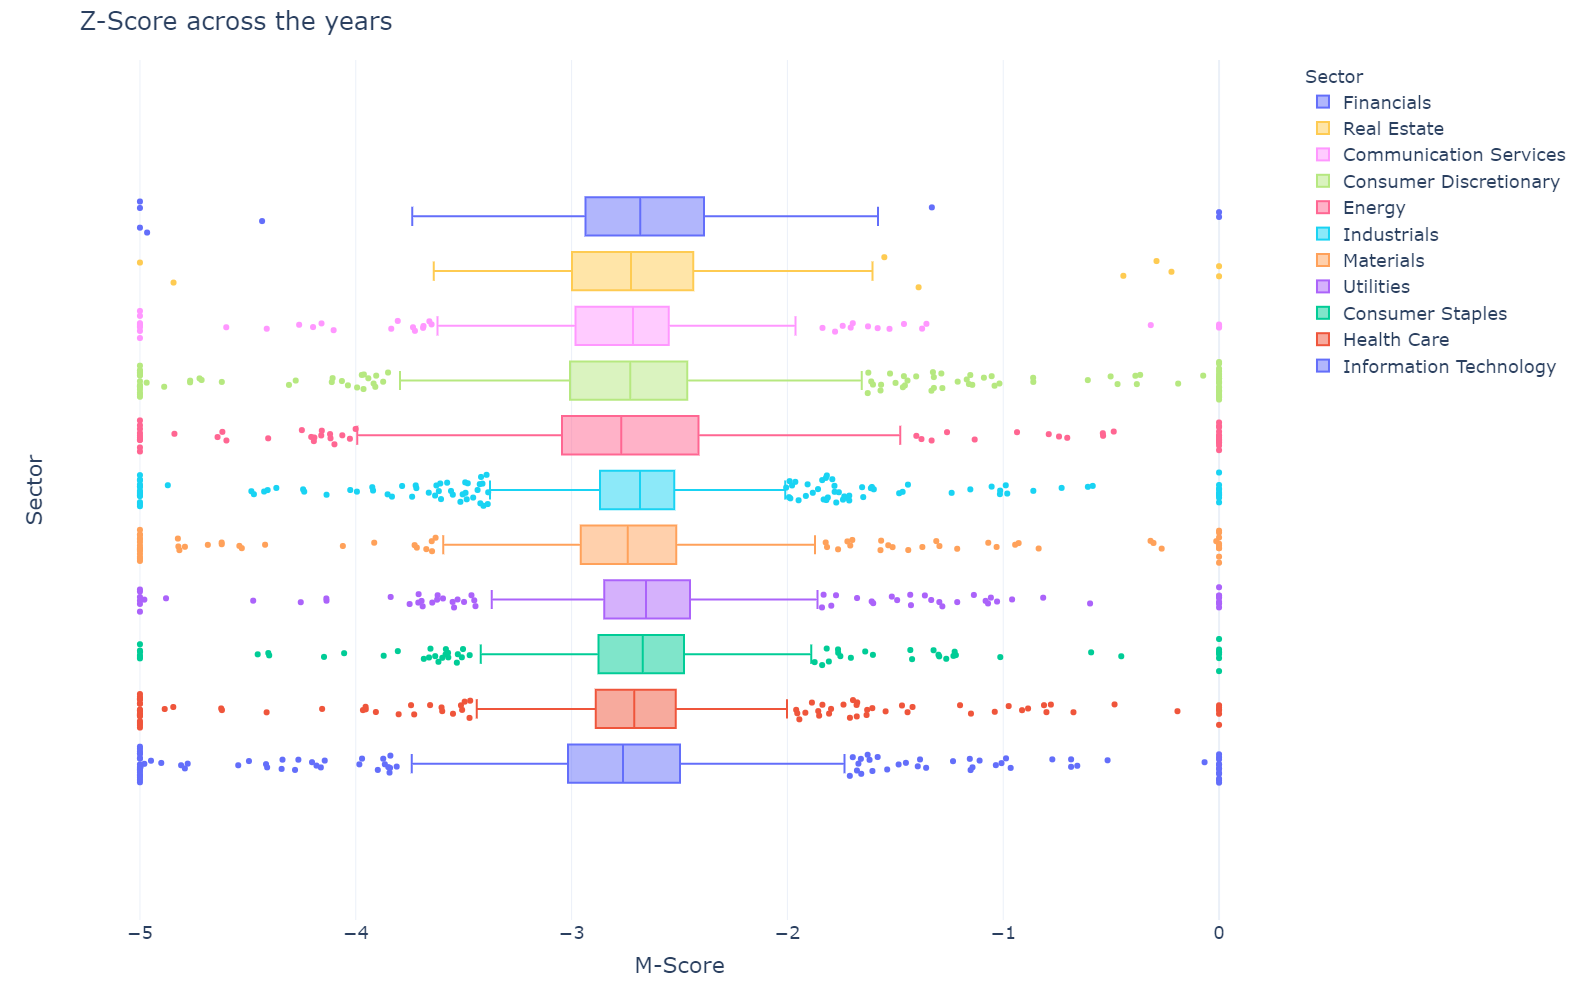

In [33]:
plot_score(m_score = True, sectors = True)

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The m-score across sectors stays relatively centered around -2.75 however there are more extreme values as the highest m-score in the data is 171 and the lowest value is -381 as can be seen below</strong>

In [34]:
print("The highest m-score value is :", full_df["m-score"].max())
print("The lowest m-score value is :", full_df["m-score"].min())

The highest m-score value is : 171.8156338396086
The lowest m-score value is : -381.0696653277959


<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The m-score can be further explored and we could compute other statistics, nevertheless now we are going to plot the z-score across sectors</strong>

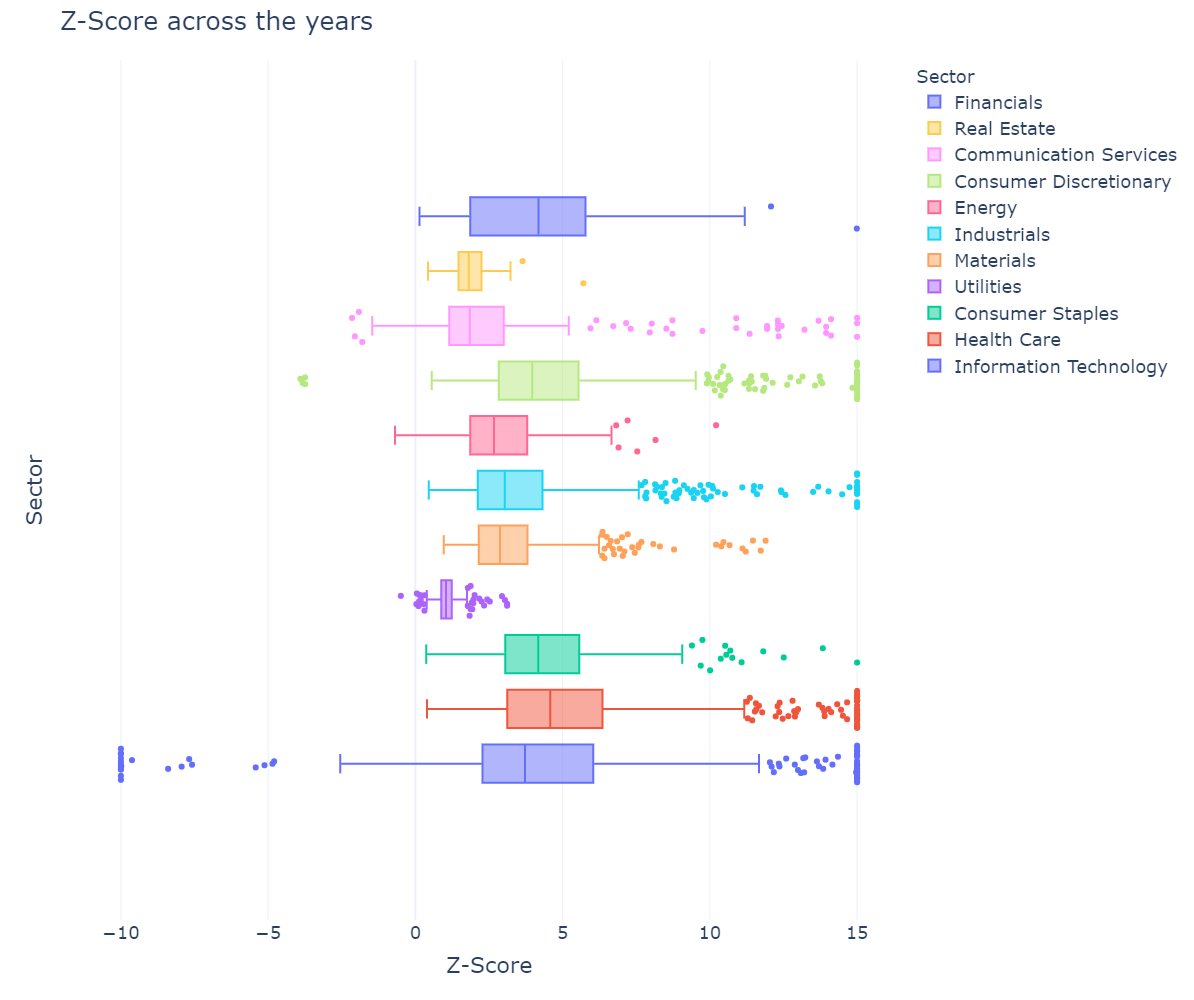

In [35]:
plot_score(m_score = False, sectors = True)

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the z-score the results are more varied, especially for the IT sector which has the most negative outliers. In addition, the median value of the z-score is more distributed across the sectors, particularly the utilities, the communication services and the real estate sectors exhibit a lower value, although in the original paper (Altman 1968), Altman justified lower values for the real state and the manufacturing sectors. </strong>

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now we are going to plot the m-score and the z-score across the dates to get an idea of the historical change</strong>

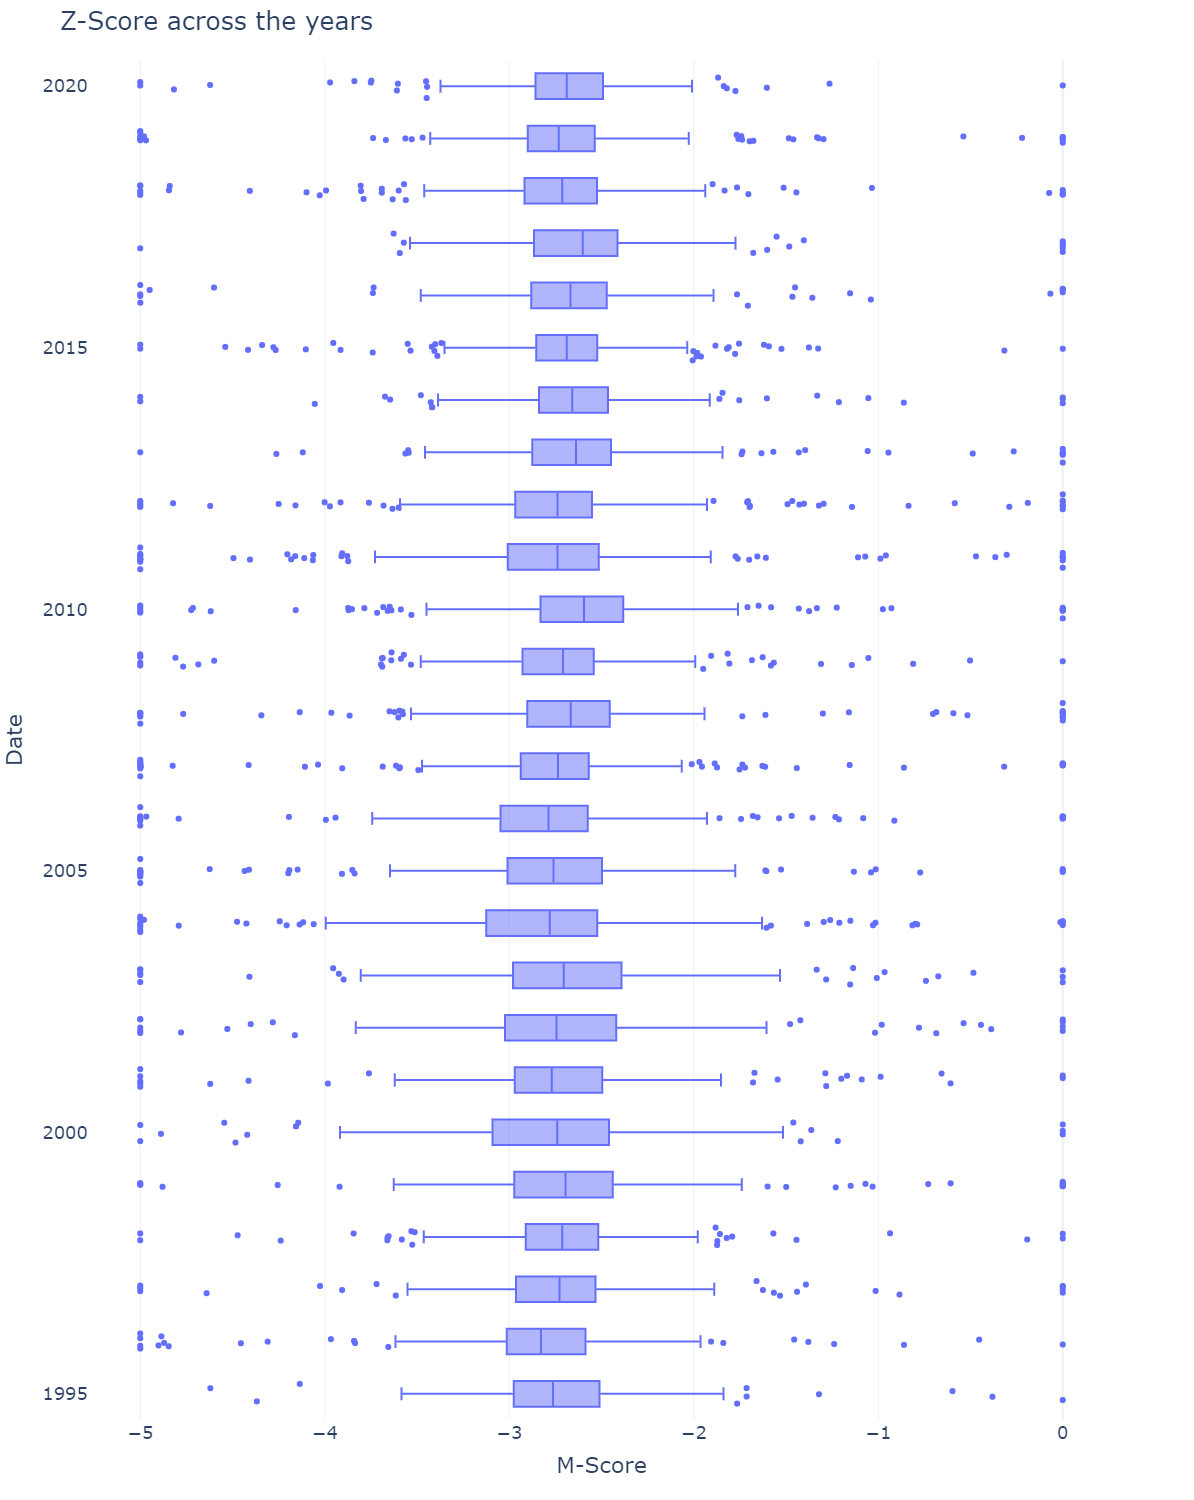

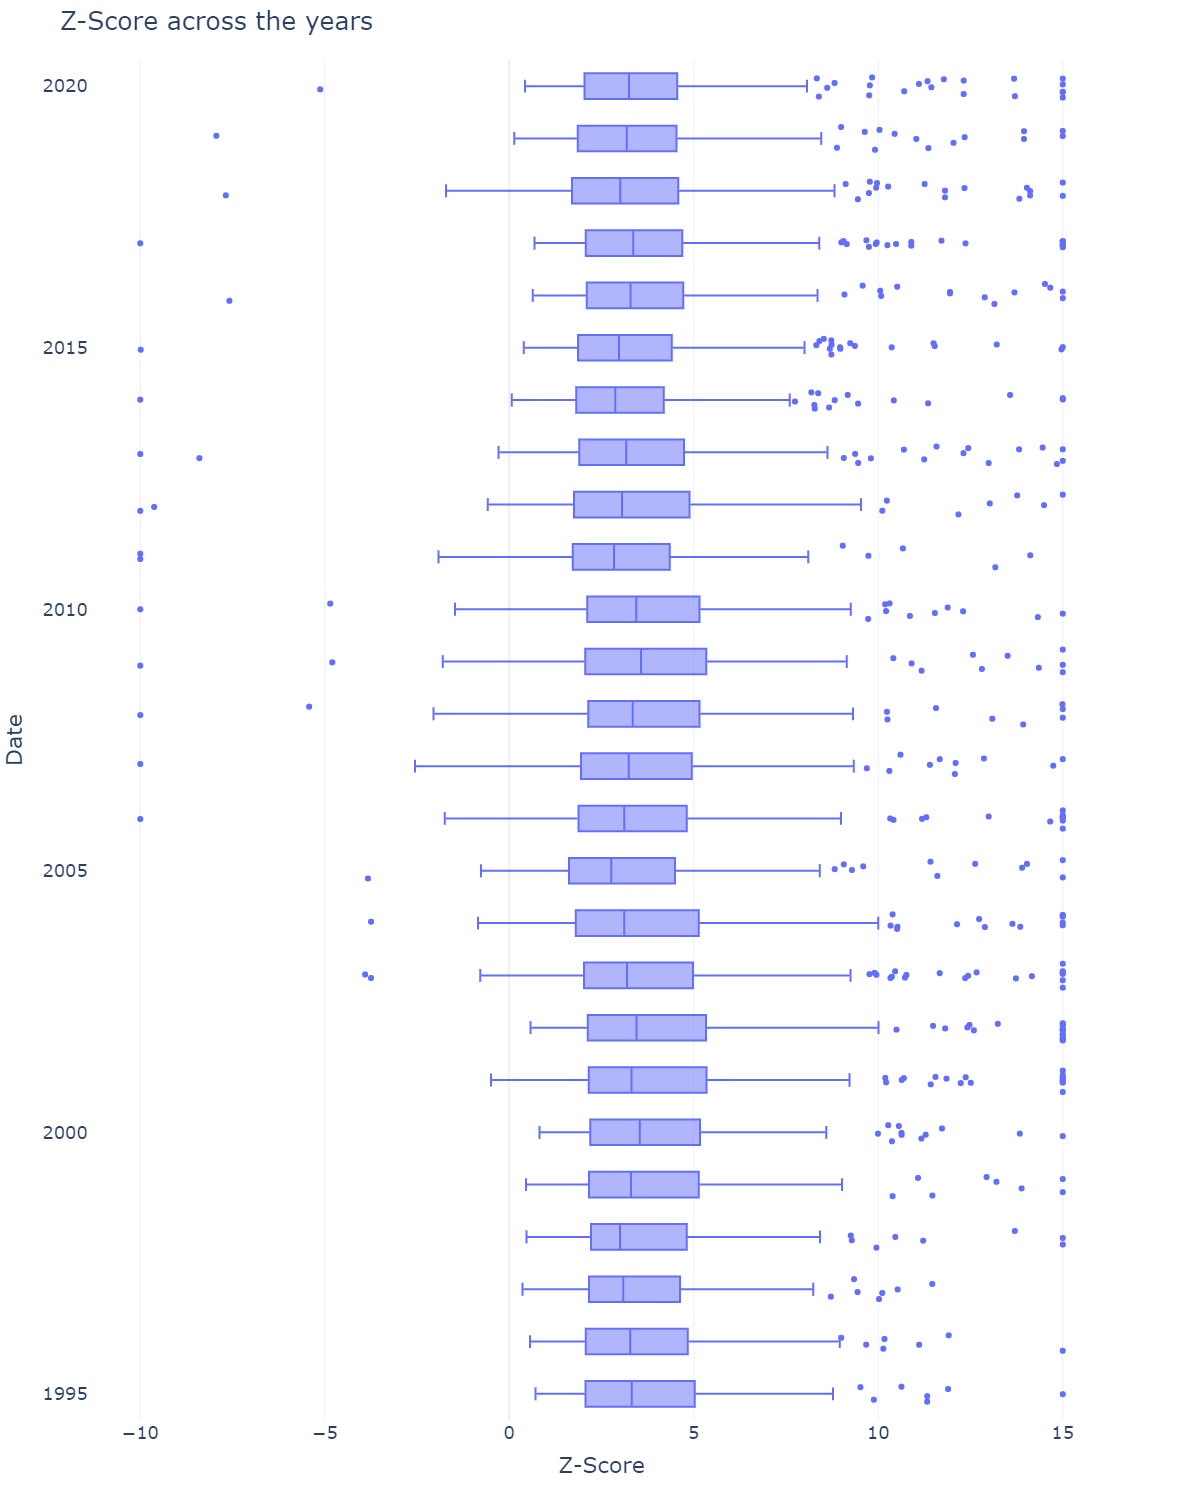

In [36]:
plot_score(m_score = True, sectors = False)
plot_score(m_score = False, sectors = False)

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The median of both scores stays relatively stable over the years considered. The values are calculated below:</strong>

In [37]:
print("The mean m-score value is :", full_df["m-score"].median())
print("The mean z-score value is :", full_df["z-score"].median())

The mean m-score value is : -2.7083894657236582
The mean z-score value is : 3.1818102506876196


<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now we are going to create the screening filters. We create a filter for companies having an m-score lower than -2.22 and a z-score higher than 3. Then, we create another filter for m-scores higher than -1.78 and z-scores lower than 1.81.</strong>

In [38]:
long_z_score =  (full_df["z-score"] > 3)
short_z_score = (full_df["z-score"] < 1.81)

long_m_score = (full_df["m-score"] < -2.22 )
short_m_score = (full_df["m-score"] > -1.78 )

long_screening =  long_z_score & long_m_score
short_screening = short_z_score & short_m_score

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We are ready to test the results of our models, first we will create two empty lists to store our results. For each year, we store the a tuple consisting of the year, the number of stocks after applying the screening filters and the average returns of the companies that fulfilled the criteria. Finally we convert the lists to arrays and we create two dataframes to facilitate the analysis. To facilitate further analysis we define a function that accepts the screening filters as parameters.</strong>

In [39]:
def get_df_results(long_filter, short_filter):

    long_results = []
    short_results = []

    for date in full_df["date"].unique(): 
        date = str(date)
        long_universe = long_filter & (full_df["date"] == date)
        short_universe = short_filter & (full_df["date"] == date)

        long_results.append((
            date, 
            len(full_df[long_universe]),
            full_df["returns"][long_universe].astype(np.float64).mean()
        ))

        short_results.append((
            date, 
            len(full_df[short_universe]),
            full_df["returns"][short_universe].astype(np.float64).mean()
        ))

    long_results = np.array(long_results)
    short_results = np.array(short_results)

    df_long = pd.DataFrame(long_results[:, 1:], long_results[:, 0], ["stocks", "returns"], np.float64)
    df_short = pd.DataFrame(short_results[:, 1:], short_results[:, 0], ["stocks", "returns"], np.float64)
    
    return df_long, df_short

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now we will create 6 dataframes, one based on the m-score screening alone, one based on the z-score alone and one combining both screening methods.</strong>

In [40]:
df_m_long, df_m_short = get_df_results(long_m_score, short_m_score)
df_z_long, df_z_short = get_df_results(long_z_score, short_z_score)
df_long, df_short = get_df_results(long_screening, short_screening)

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To facilitate visualization we join the long and short dataframes and compute the returns of the companies in the long screening minus the returns of those in the short screening</strong>

In [41]:
def join_df(df_l, df_s):
    df_j = df_l.join(df_s, how = "inner", lsuffix = "_long", rsuffix = "_short")
    df_j["results"] = df_j["returns_long"] - df_j["returns_short"]
    return df_j

df_m_joined = join_df(df_m_long, df_m_short)
df_z_joined = join_df(df_z_long, df_z_short)
df_joined = join_df(df_long, df_short)

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now we are going to define a function to plot the results across the years, we want to visualize the returns of the stocks that passed the long criteria, the short criteria and the difference between them.</strong>

In [42]:
def plot_returns(df, title = ""):
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = df.index, 
                             y = df["returns_long"], 
                             mode ='lines+markers',
                             name ='long screening'))
    
    fig.add_trace(go.Scatter(x = df.index, 
                             y = df["returns_short"],
                             mode ='lines+markers',
                             name ='short screening'))

    fig.add_trace(go.Scatter(x = df.index, 
                             y = df["results"],
                             mode ='lines+markers',
                             name ='results'))

    fig.update_layout(
        title = title,
        xaxis_title = "Dates",
        yaxis_title = "Returns",
        template = "plotly_white",
        font = dict(size = 18),
        height = 800, 
        width = 1000)

    fig.show()

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Before plotting the results we will compute the average performance of our screening method. As we can see below the filters alone perform better than the joined filter, producing an average of 2% each year versus 0.32 %.</strong>

In [43]:
print("The m-score filter alone produces a yearly average of :", round(df_m_joined["results"].mean(), 2), "%")
print("The z-score filter alone produces a yearly average of :", round(df_z_joined["results"].mean(), 2), "%")
print("The joined filter produces a yearly average of :", round(df_joined["results"].mean(), 2), "%")

The m-score filter alone produces a yearly average of : 2.06 %
The z-score filter alone produces a yearly average of : 2.24 %
The joined filter produces a yearly average of : 0.32 %


<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However, when we compute the average of companies in our filter it seems that very few companies passed the joined criteria for the short side. On average only 3.8 companies passed the combined short criteria</strong>

In [44]:
print(df_m_joined["stocks_long"].mean(), "companies passed the m-score long criteria and",
      df_m_joined["stocks_short"].mean(), "companies passed the short")

print(df_z_joined["stocks_long"].mean(), "companies passed the z-score long criteria and",
      df_z_joined["stocks_short"].mean(), "companies passed the short")

print(df_joined["stocks_long"].mean(), "companies passed the combined long criteria and",
      df_joined["stocks_short"].mean(), "companies passed the short")

200.34615384615384 companies passed the m-score long criteria and 13.0 companies passed the short
121.42307692307692 companies passed the z-score long criteria and 49.69230769230769 companies passed the short
108.03846153846153 companies passed the combined long criteria and 3.769230769230769 companies passed the short


<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As we can see below, the results across the years are quite volatile for the m-score, however since 2005 the results become more stable and the companies in the long screening outperform the companies in the short screening in a more consistent way.</strong>

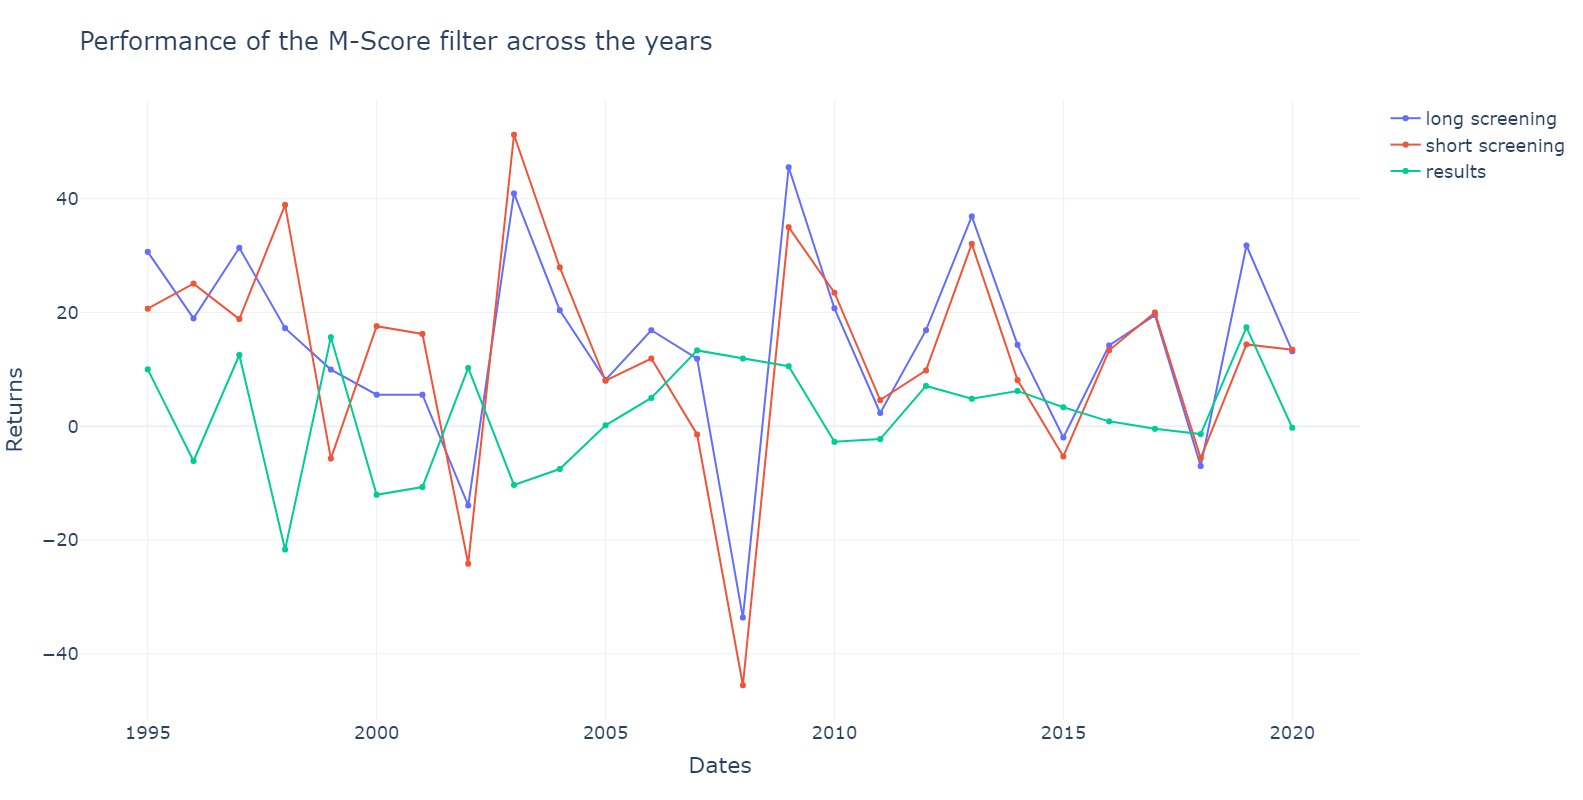

In [45]:
plot_returns(df_m_joined, "Performance of the M-Score filter across the years")

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The results for the z-score are also volatile across the years.</strong>

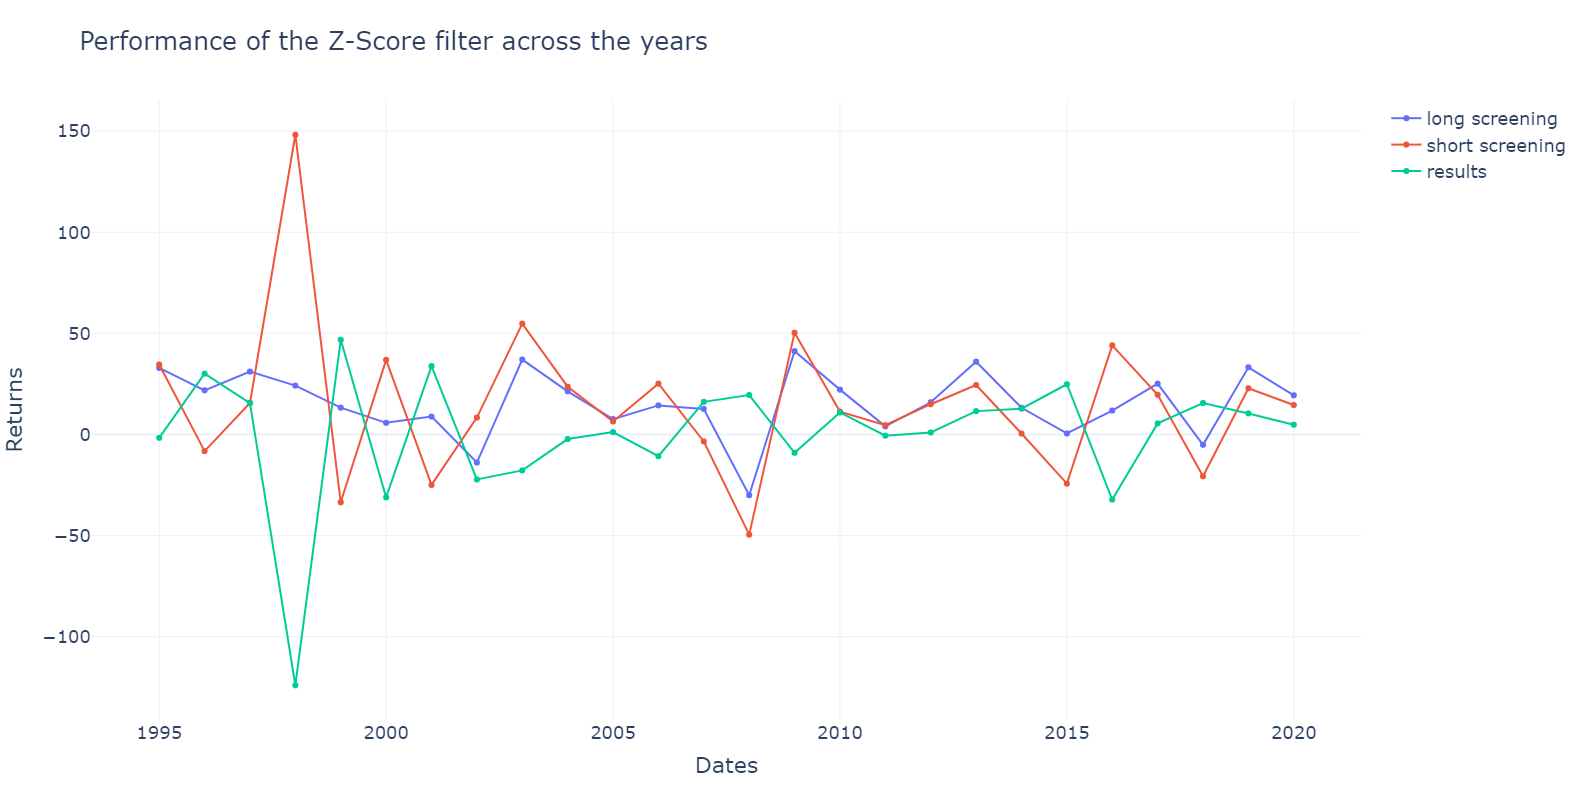

In [46]:
plot_returns(df_joined, "Performance of the Z-Score filter across the years")

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By observing the results of the combined screening method we can notice how 1998 was the worst performing year by far</strong>

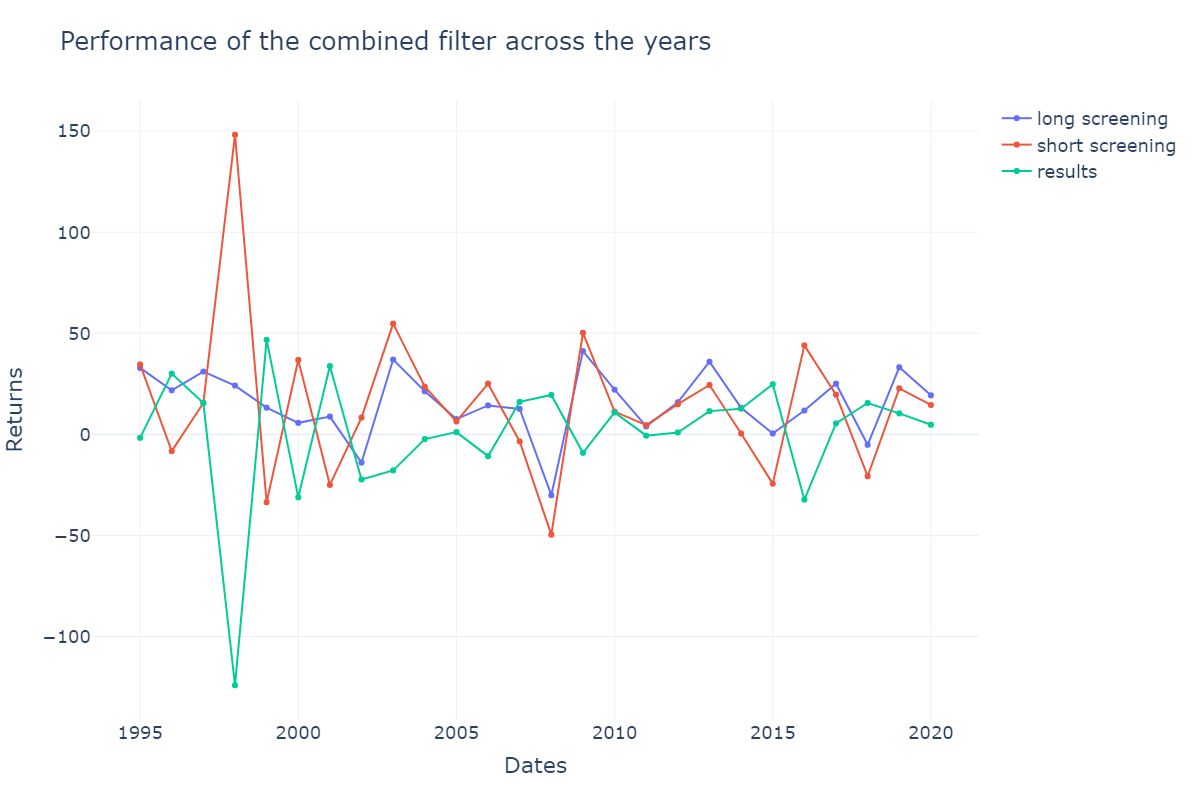

In [47]:
plot_returns(df_joined, "Performance of the combined filter across the years")

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By looking closer at our data, we notice that only one stock passed the short criteria that year, and if we excluded that year from the computation of the mean, the results improve a lot, obtaining a 5.29% which is much better than each of the single filters alone</strong>

In [48]:
print(df_joined.loc["1998"]["stocks_short"], "Company passed the short criteria in 1998")
print("The average yearly returns excluding 1998 is", df_joined.drop("1998")["results"].mean())

1.0 Company passed the short criteria in 1998
The average yearly returns excluding 1998 is 5.29053425149859


<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To test the results of the m-score and the z-score on a more balanced universe of stocks, now we are going to create the screening methods using our previously computed quintiles instead of the fixed values for the m-score and the z-score. In addition, we will separate the results across sectors. First we define a variable to store the sectors.</strong>

In [49]:
sectors = full_df["sector"].unique()

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now we are going to compare the results across sectors and instead of screening the stocks using fixed numbers for the z-score and the m-score we use the quintiles across sectors that we stored in dictionaries before. We start with a few modifications to create two dataframes to store the results for each year and each sector using our new screening method. Finally we join the two dataframes using our previously defined function. </strong>

In [50]:
long_results = []
short_results = []

for date in dates[2:]:
    for sector in sectors:

        # If there is missing data for a sector on a given year we skip it

        if (sector not in long_quantiles[date]["m-score"].keys() or
            sector not in long_quantiles[date]["z-score"].keys() or
            sector not in short_quantiles[date]["m-score"].keys() or
            sector not in short_quantiles[date]["z-score"].keys()): continue

        long_universe = ((full_df["date"] == str(date)) & 
                         (full_df["sector"] == sector) & 
                         (full_df["m-score"] <= long_quantiles[date]["m-score"][sector]) &
                         (full_df["z-score"] >= long_quantiles[date]["z-score"][sector]))

        short_universe = ((full_df["date"] == str(date)) & 
                          (full_df["sector"] == sector) & 
                          (full_df["m-score"] >= short_quantiles[date]["m-score"][sector]) &
                          (full_df["z-score"] <= short_quantiles[date]["z-score"][sector]))

        long_results.append((
            date,
            sector,
            len(full_df[long_universe]),
            full_df["returns"][long_universe].astype(np.float64).mean()
        ))

        short_results.append((
            date,
            sector,
            len(full_df[short_universe]),
            full_df["returns"][short_universe].astype(np.float64).mean()
        ))

long_results = np.array(long_results)
short_results = np.array(short_results)

cols = ["stocks", "returns"]

# We want to create a multiindex Dataframe containing the year and the sector, thus we first create the multiindex

long_arrays = [long_results[:, 0], long_results[:, 1]]
short_arrays = [short_results[:, 0], short_results[:, 1]]

long_index = pd.MultiIndex.from_arrays(long_arrays, names=["date", "sector"])
short_index = pd.MultiIndex.from_arrays(short_arrays, names=["date", "sector"])

# Now we create the multiindex Dataframes

df_long_sectors = pd.DataFrame(long_results[:, 2:], long_index, cols, np.float64)
df_short_sectors = pd.DataFrame(short_results[:, 2:], short_index, cols, np.float64)

# Finally, we create the joined Dataframe

df_joined_sectors = join_df(df_long_sectors, df_short_sectors)

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now we are going to plot the results across sectors and across years.</strong>

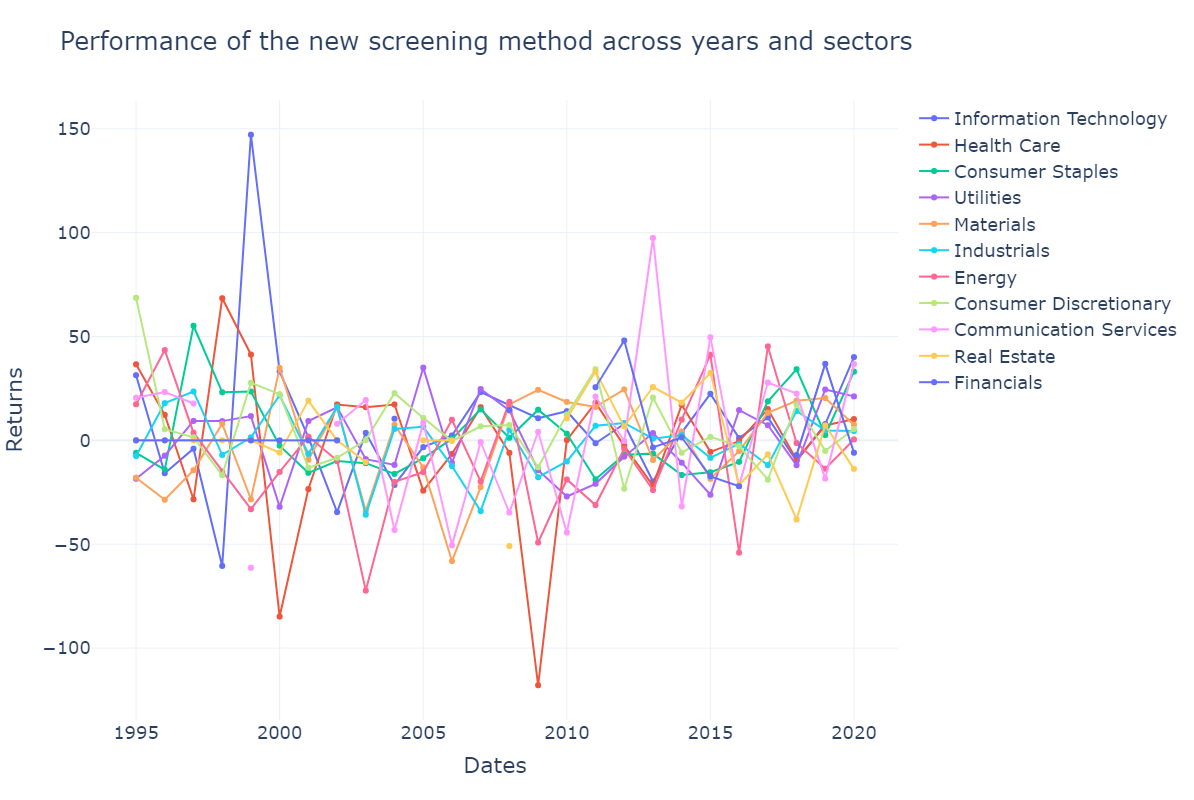

In [51]:
fig = go.Figure()
    
for sector in sectors:
    
    fig.add_trace(go.Scatter(x=df_joined_sectors.xs(sector, level="sector").index, 
                             y=df_joined_sectors.xs(sector, level="sector")["results"],
                             mode = 'lines+markers',
                             name = sector))
    
fig.update_layout(
    title = "Performance of the new screening method across years and sectors",
    xaxis_title = "Dates",
    yaxis_title = "Returns",
    template = "plotly_white",
    font = dict(size = 18),
    height = 800,
    width = 1000)

fig.show()

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There is a lot of information that we can analyze, so it is bettet to summarize it, we are first going to compute the results across sectors and store the results.</strong>

In [52]:
sectors_results = []    

for sector in sectors:
    sectors_results.append(df_joined_sectors.xs(sector, level = "sector")["results"].mean())

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now we are going to do the same but across the years.</strong>

In [53]:
dates_results = []    

for date in df_joined_sectors.xs(slice(None), level = "sector").index.unique():
    dates_results.append(df_joined_sectors.xs(date, level = "date")["results"].mean())

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Let's now plot the results first across sectors and then across years for better visualization.</strong>

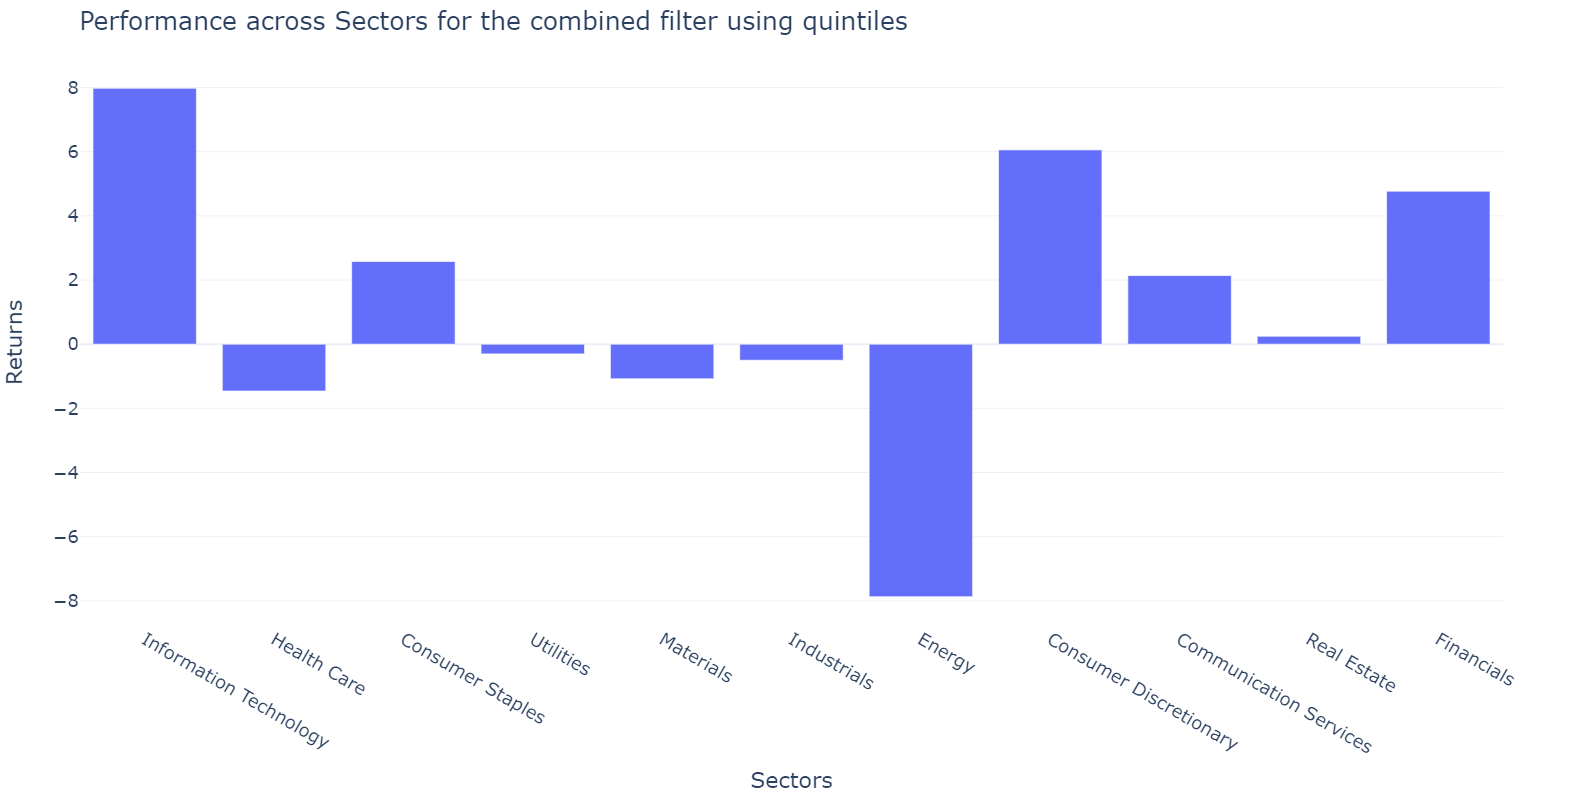

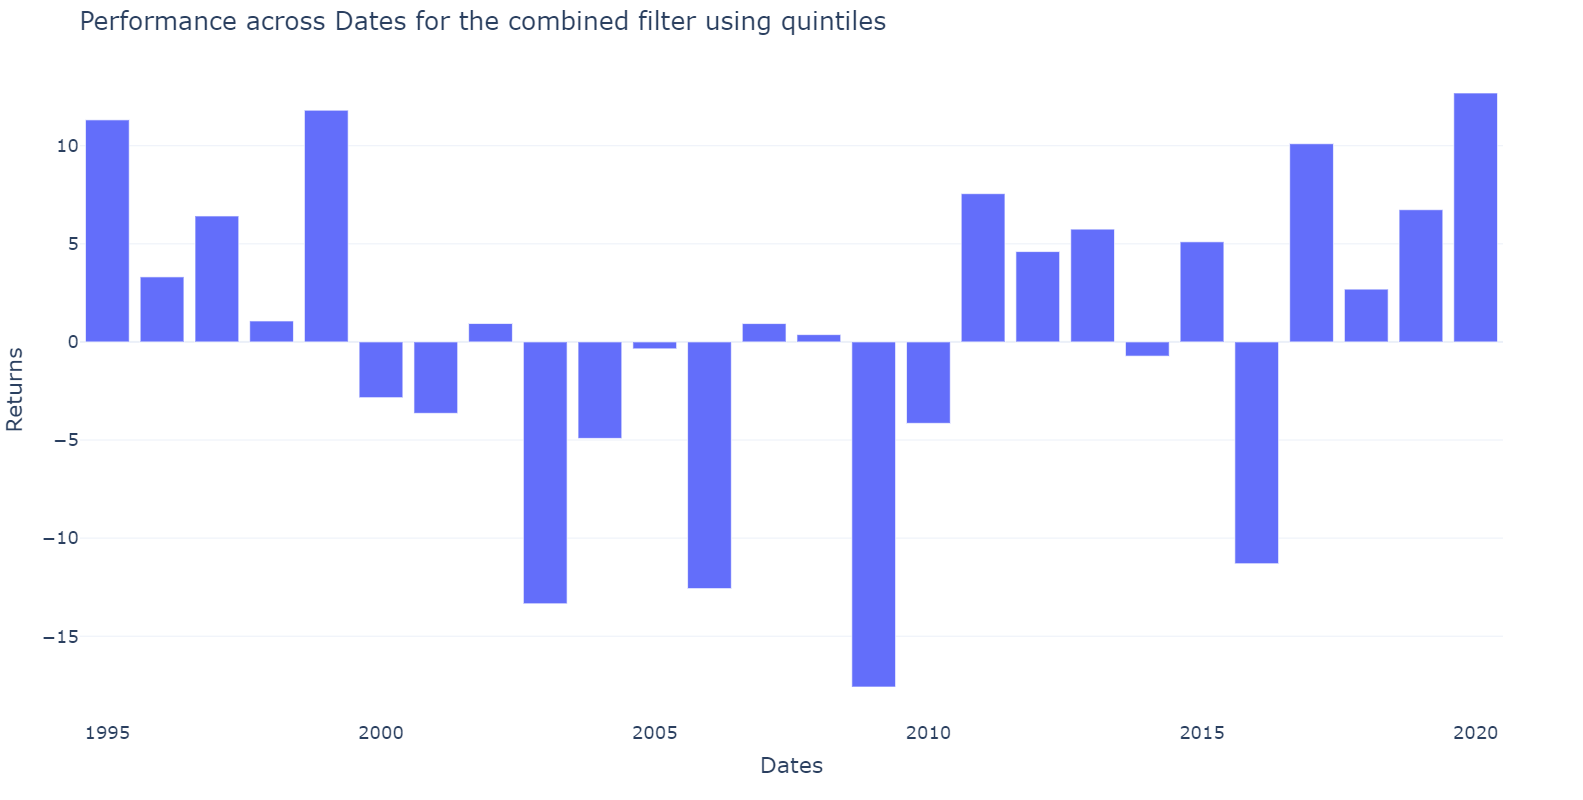

In [54]:
def plot_results_across(across_sectors = True, title = ""):

    across_x = sectors if across_sectors else df_joined_sectors.xs(slice(None), level = "sector").index.unique()
    across_y = sectors_results if across_sectors else dates_results

     
    fig = px.bar(x = across_x, y = across_y)

    fig.update_layout(
        title = title,
        xaxis_title = "Sectors" if across_sectors else "Dates",
        yaxis_title = "Returns",
        template = "plotly_white",
        font = dict(size = 18),
        height = 800,
        width = 1000)

    fig.show()
    
plot_results_across(title = "Performance across Sectors for the combined filter using quintiles")
plot_results_across(across_sectors = False, title = "Performance across Dates for the combined filter using quintiles")

<strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The results vary a lot across sectors and across years however our new filter performed slightly better than the previous combined filter. Neverthess, the individual filters still perform much better.</strong>

In [55]:
print("The average yearly result of our new filter is", round(df_joined_sectors["results"].mean(),2), "%")

The average yearly result of our new filter is 1.02 %


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The results across sectors using the new defined filter show that for the financial sector, which is most of the time excluded for studies based on the m-score and the z-score, the obtained results are close to a 5 % more return yearly for those banks fulfilling the criteria of the quintiles. In addition, the IT sector, the communication services and the consumers sectors all obtained over a 2 % better returns yearly.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It is important to note, that the z-score was originally created for manufacturing companies. Altman later created a modified version of the z-score for companies that are not manufacturing and for emerging markets. 

<h2> 4. Conclusions </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis performed for the constituents of the S&P500 from 1995 to 2020 exhibits good results for both the m-score and the z-score as screening methods for the companies analysed. The combined model using the original cut-offs produces very few companies in the short screening. However, these companies are blue chips whose market capitalization is enormous, and their financial statements are constantly reviewed, thus it is not expected that many of them would be considered manipulators employing well knowns models such as the Beneish’s m-score.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By screening the companies based on their relative m-score and z-score across sectors, the results of the screening method still perform well, producing better returns in the long screening than in the short screening. However, these results are worse than using the original numbers suggested by the authors for their models. It could be useful to add a measure of performance, instead of only looking at the probability of earnings manipulation and the probability of bankruptcy. Therefor, the companies could be filtered using a screening method and then ranked based on the performance. Nevertheless, this method could be more useful for companies in the long screening of the m-score model, as those in the short screening are more likely to have manipulated their earning and thus their reported performance would not be comparable across other companies.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finally, the usefulness of the m-score and the z-score for investors are still relevant and they have produced positive results even years after their publication. Still, it is crucial to remember that this analysis made some assumptions explained in 3 Model definition, data and analysis. 


<h3> Future lines of work </h3>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The imbalanced number of stocks after the screening method using the original cut-offs for the constituents of the S&P500 could be further expanded to smaller companies which might result in a more balanced dataset. 
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Moreover, the financial statements could be adjusted to improve comparability across companies, given the flexibility of accounting choices. In addition, when comparing companies reporting under different standards such as the IFRS and the US GAAP there are multiple differences that could be taken into consideration before computing the z-score and the m-score.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Another approach for detecting financial fraud was carried out with support vector machines and ensemble methods for US companies from 1991 to 2005 obtaining better performance than the Beneish model, using 24 raw financial variables instead of ratios (Li et al., 2015). This result is very promising, and the use of machine learning could be implemented to carry out the analysis as a method for screening stocks. However, more data would be needed as the dataset for that study contained more than 100.000 data points for different firms.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finally, previous financial statements could be employed to carry out the analysis, the m-score included the previous year financial statements, nevertheless another approach for screening could include previous m-scores in the calculation or even a feature containing the historical highest probability of earnings manipulation of a company. 


<h3> Bibliography </h3>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Adu-Gyamfi, M., 2020. Investigating Financial Statement Fraud in Ghana using Beneish M-Score: A Case of Listed Companies on the Ghana Stock Exchange (GSE). [SSRN Scholarly Paper] Rochester, NY: Social Science Research Network. Available at: <https://papers.ssrn.com/abstract=3627689> [Accessed 31 Dec. 2020].
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Akra, R.M. and Chaya, J.K., 2020. Testing the Effectiveness of Altman and Beneish Models in Detecting Financial Fraud and Financial Manipulation: Case Study Kuwaiti Stock. International Journal of Business and Management, 15(10), p.70.
Alfian, F. and Triani, N.N.A., 2018. FRAUDULENT FINANCIAL REPORTING DETECTION USING BENEISH M-SCORE MODEL IN PUBLIC COMPANIES IN 2012-2016. p.16.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Altman, E.I., 1968. FINANCIAL RATIOS, DISCRIMINANT ANALYSIS AND THE PREDICTION OF CORPORATE BANKRUPTCY. The Journal of Finance, 23(4), pp.589–609.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Anning, A.A. and Adusei, M., 2020. An Analysis of Financial Statement Manipulation among Listed Manufacturing and Trading Firms in Ghana. Journal of African Business, 0(0), pp.1–15.
Beneish, M.D., Lee, C., Press, E., Whaley, B., Zmijewski, M. and Cisilino, P., 1999. The detection of earnings manipulation. Financial Analysts’ Journal, pp.24–36.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dreyer CFA, C., 2020. The End of Accounting? Sustaining Financial Reporting. [online] CFA Institute Enterprising Investor. Available at: <https://blogs.cfainstitute.org/investor/2020/12/30/the-end-of-accounting-sustaining-financial-reporting/> [Accessed 1 Jan. 2021].
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hakami, T., Rahmat, M.M., Yaacob, M.H. and Saleh, N.M., 2020. Fraud Detection Gap between Auditor and Fraud Detection Models: Evidence from Gulf Cooperation Council. Asian Journal of Accounting and Governance, 13(0), pp.1–13.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hołda, A., 2020. Using the Beneish M-score model: Evidence from non-financial companies listed on the Warsaw Stock Exchange. Investment Management and Financial Innovations, 17(4), pp.389–401.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kamal, M.E.M., Salleh, M.F.M. and Ahmad, A., 2016. Detecting Financial Statement Fraud by Malaysian Public Listed Companies: The Reliability of the Beneish M-Score Model. Jurnal Pengurusan (UKM Journal of Management), [online] 46(0). Available at: <https://ejournal.ukm.my/pengurusan/article/view/8601> [Accessed 31 Dec. 2020].
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Li, B., Yu, J., Zhang, J. and Ke, B., 2015. Detecting Accounting Frauds in Publicly Traded U.S. Firms: A Machine Learning Approach. p.16.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Mihalcea, M.-M., 2020. Detecting the Risk of Manipulation of Financial Statements for Companies on the Bucharest Stock Exchange Applying the Beneish Model. LUMEN Proceedings, 13, pp.182–193.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Özcan, A., 2018. The Use of Beneish Model in Forensic Accounting: Evidence from Turkey. p.11.
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Papa CFA, V.P.P., CPA, FSA, 2018. The End of Accounting? Not So Sure. [online] CFA Institute Market Integrity Insights. Available at: <https://blogs.cfainstitute.org/marketintegrity/2018/02/01/the-end-of-accounting-not-so-sure/> [Accessed 1 Jan. 2021].
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Taherinia, M. and Talebi, R., 2019. ABILITY OF FRAUD TRIANGLE, FRAUD DIAMOND, BENEISH M SCORE, AND ALTMAN Z SCORE TO PREDICT FINANCIAL STATEMENTS FRAUD. p.14.

